# **Optimizacion por enjambre de particulas**
**Flores Estopier Rodrigo**

Se realiza un algoritmo que nos permite optimizar la funcion de Rosenbrock en 3 dimensiones, la cual tiene su punto optimo en **texto en negrita**

Button(description='Next Iteration', icon='check', style=ButtonStyle(), tooltip='Next Iteration')

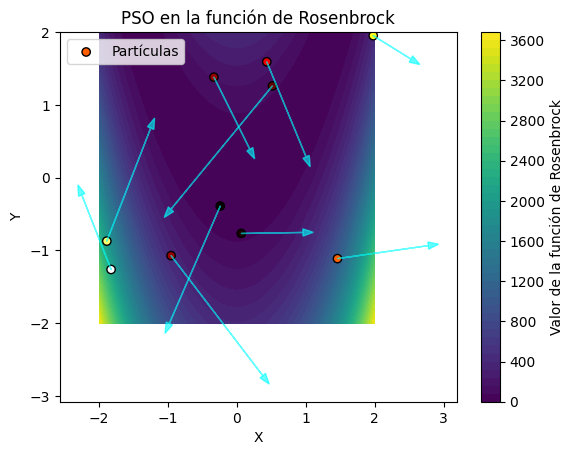

In [9]:
import ipywidgets as widgets
from IPython import display as display
import matplotlib.pyplot as plt
import numpy as np

def create_button():
    button = widgets.Button(
        description='Next Iteration',
        disabled=False,
        button_style='',  # 'success', 'info', 'warning', 'danger' or ''
        tooltip='Next Iteration',
        icon='check'  # (FontAwesome names without the `fa-` prefix)
    )
    return button

lower_limit = -2
upper_limit = 2

n_particles = 10
n_dimensions = 3

# Definir la función de Rosenbrock en 3D
def rosenbrock(X):
    x = X[0]
    y = X[1]
    z = X[2]
    return (x-1)**2 + 100 * (y - x**2)**2 + (y-1)**2 + 100 * (z - y**2)**2


# Inicializar posiciones y velocidades de partículas
X = lower_limit + (upper_limit - lower_limit) * np.random.rand(n_particles, n_dimensions)
V = -(upper_limit - lower_limit) / 2 + (upper_limit - lower_limit) * np.random.rand(n_particles, n_dimensions)

# Inicializar las mejores posiciones
fitness_gbest = np.inf
fitness_lbest = fitness_gbest * np.ones(n_particles)
#print(fitness_lbest)
X_lbest = 1 * X
X_gbest = 1 * X_lbest[0]

for I in range(0, n_particles):
    if rosenbrock(X_lbest[I]) < rosenbrock(X_gbest):
        X_gbest = 1 * X_lbest[I]

count = 0

def iteration(b):
    global count
    global X, X_lbest, X_gbest, V

    weight = 0.8
    C1 = 0.3
    C2 = 0.4

    #display.clear_output(wait=True)
    #display.display(button)
    count += 1
    print(count, "Best particle in:", X_gbest, " gbest: ", rosenbrock(X_gbest))

    # Actualizar velocidad y posición de las partículas
    for I in range(n_particles):
        for J in range(n_dimensions):
            R1 = np.random.rand()
            R2 = np.random.rand()
            V[I][J] = (weight * V[I][J]
                       + C1 * R1 * (X_lbest[I][J] - X[I][J])
                       + C2 * R2 * (X_gbest[J] - X[I][J]))
            X[I][J] = X[I][J] + V[I][J]
        if rosenbrock(X[I]) < rosenbrock(X_lbest[I]):
            X_lbest[I] = 1 * X[I]
            if rosenbrock(X_lbest[I]) < rosenbrock(X_gbest):
                X_gbest = 1 * X_lbest[I]
    if count == 1:
      graph_population(X, V)

# Gráfica de la función de Rosenbrock en 2D con mapa de calor
def graph_f():
    x_vals = np.linspace(lower_limit, upper_limit, 100)
    y_vals = np.linspace(lower_limit, upper_limit, 100)
    X_mesh, Y_mesh = np.meshgrid(x_vals, y_vals)
    Z_mesh = (X_mesh-1)**2 + 100 * (Y_mesh - X_mesh**2)**2  # Función de Rosenbrock proyectada en 2D

    plt.contourf(X_mesh, Y_mesh, Z_mesh, levels=50, cmap='viridis')
    plt.colorbar(label='Valor de la función de Rosenbrock')
    plt.xlabel('X')
    plt.ylabel('Y')

# Función para graficar la población de partículas con velocidad y dirección
def graph_population(X, V):
    plt.clf()
    graph_f()
    z_particles = [rosenbrock([p[0], p[1], 0]) for p in X]  # Valor de Rosenbrock en (x, y, z=0) para cada partícula

    # Graficar las partículas con sus profundidades y velocidades
    plt.scatter(X[:, 0], X[:, 1], c=z_particles, cmap='hot', edgecolor='k', label="Partículas")
    #plt.colorbar(label='Profundidad de partículas')

    # Dibujar vectores de velocidad
    for i in range(n_particles):
        plt.arrow(X[i, 0], X[i, 1], V[i, 0], V[i, 1], color='cyan', head_width=0.1, alpha=0.6)

    plt.title('PSO en la función de Rosenbrock')
    plt.legend()
    plt.show()

# Botón para iterar
button = create_button()
button.on_click(iteration)
display.display(button)

# Gráfica inicial
graph_population(X, V)


601 Best particle in: [0.99050772 0.98112711 0.96268068]  gbest:  0.0004468298400365578
602 Best particle in: [0.99051378 0.98118784 0.96273631]  gbest:  0.00044438464673967617
603 Best particle in: [0.99053363 0.98123805 0.96277856]  gbest:  0.00044252728490753833
604 Best particle in: [0.99059375 0.98127923 0.96287534]  gbest:  0.00043905870015232374
605 Best particle in: [0.99065072 0.98135623 0.96316161]  gbest:  0.0004361369882683016
606 Best particle in: [0.9906968  0.9814328  0.96328635]  gbest:  0.00043209250348745997
607 Best particle in: [0.99073366 0.98149405 0.96338614]  gbest:  0.00042899358101172735
608 Best particle in: [0.99071727 0.98159731 0.9635296 ]  gbest:  0.00042541630806961357
609 Best particle in: [0.9907545  0.98166232 0.96365166]  gbest:  0.0004222188278894007
610 Best particle in: [0.99079832 0.98173178 0.96382292]  gbest:  0.0004187193122807922
611 Best particle in: [0.99088655 0.98181612 0.96400285]  gbest:  0.00041402859393860206
612 Best particle in: [0.

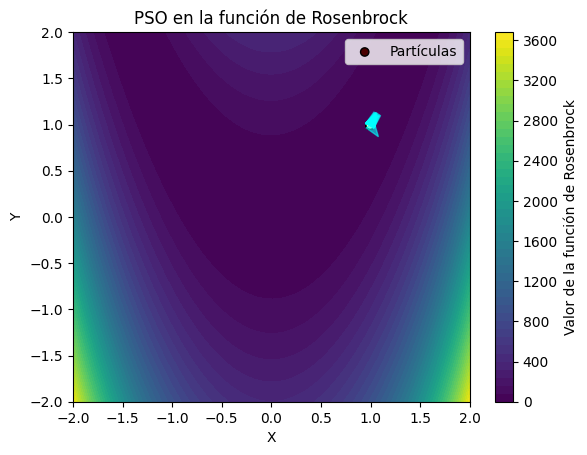

In [16]:
for i in range(100):
    iteration(None)

graph_population(X, V)
